# Grade: /100 Marks

# Assignment 02: Maximum Likelihood

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

### Maximum Likelihood

The [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake.

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

### Global Toolbox

In [ ]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display

### Question 1: /2 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 15])`. It should yield a value about 49.23.

Test your function by calling it with `lamb = np.array([1, 0.5, 8, 5])` and  `y = np.array([1.5, 0.8, 5.5, 4])`. It should yield a value about 62.90.

FYI: The domain of logarithmic function of $\lambda$ is $\lambda > 0$.

In [ ]:
# Write the function
def exponentialNegLogLikelihood(lamb, y):
    neg_log_lik = -np.sum(np.log(lamb) - y * (lamb))
    return neg_log_lik
# 2 pts

In [ ]:
# Test
lamb = 2
y = np.array([1, 4, 6, 15])
exponentialNegLogLikelihood(lamb, y)

49.227411277760226

In [ ]:
# Test
lamb = np.array([1, 0.5, 8, 5])
y = np.array([1.5, 0.8, 5.5, 4])
print(f"{exponentialNegLogLikelihood(lamb, y)}")

62.90426772644601


---

### Question 2: /3 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with
* `b = np.array([2, 1])`
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`
* `y = np.array([1, 2.5, 12])`

It should yield a value about 15.24.

In [ ]:
# Write the function
def exponentialRegressionNegLogLikelihood(b, X, y):
    # Here we have to be carefull since the mean of the exponential distribution is not the same as $\lambda$ parameter.
    lamb = np.exp(-X @ b)
    # Use exponentialNegLogLikelihood to compute the likelihood
    neg_log_lik = exponentialNegLogLikelihood(lamb, y)
    return neg_log_lik

# 3 pts

In [ ]:
# Test your function
b = np.array([2, 1])
X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T
y = np.array([1, 2.5, 12])
exponentialRegressionNegLogLikelihood(b, X, y)

15.23757690453085

---
### Question 3: /2 Marks

Answer the questions:

1. In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?.


2. What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$?:


**Written Answer:**

1. [1 pts] If $\lambda$ has the form of $\mathbf{X}\beta$, we cannot guarantee that $\lambda$ always has positive values. If $\lambda$ is zero or negative, then log of $\lambda$ will be undefined as required for the `exponentialNegLogLikelihood`function.

2. [1 pts] When $\exp(-\mathbf{X}\beta)$ is used, we guarantee that the parameter $\lambda$ of the exponential distribution is positive.

---
### Question 4: /2 Marks

Write a function called `Model_predict` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$.

Test your function by calling it with
* `b = np.array([2, 1])`
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`

It should yield an array with elements being about 148.4, 244.7, 99.5.

In [ ]:
# Write the function
def Model_predict(b, X):
    yhat = np.exp(X @ b)
    return yhat

# 2 pts

In [ ]:
# Test the function
b = np.array([2, 1])
X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T
Model_predict(b, X)

array([148.4131591 , 244.69193226,  99.48431564])

---
### Question 5: /7 Marks

Write a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`
* `y = np.array([0, 2.5, 10])`

Print the estimated coefficient $b$.

In [ ]:
# Write the function
def Model_fit(X, y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    nrows, ncols = X.shape
    beta_start = np.zeros((ncols, 1))
    # Minimize the appropriate likelihood function
    mle = so.minimize(exponentialRegressionNegLogLikelihood, np.squeeze(beta_start), args = (X, y), method = "Powell")
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas
# 5 pts

In [ ]:
# Test the function and print estimated b
X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T
y = np.array([0, 2.5, 10])
print(f"The estimated b is {Model_fit(X, y)}")
# 2 pts
# Consider here the answer could vary depending on the b_start but should be near to [1.1 -0.6]

The estimated b is [-0.28064565  0.71086844]


---
### Question 6: /12 Mark(s)

Use the data `exponential_regression.csv`, where $y$ represents time units to fit a exponential regression using the functions that you already have created.

* Use your function to estimate the coefficients.
* Use `mean_squared_error` to calculate the regression error.
* Plot a scatterplot of the data as well as the regression curve (plot with the range over $x \in [-2.15, 2.15]$).


In [ ]:
# Load the data
# Notice that this file is separated by semicolon (Hint: specify "sep=")
data = pd.read_csv('exponential_regression.csv', sep = ';')
# 1 pts

# Get the x and y. Create the design matrix X
x = data.x.values
X = np.c_[np.ones(x.shape), x]
y = data.y.values
# 2 pts

# Find the maximum likelihood estimates for the coefficients
betas = Model_fit(X, y)
print(f'The estimated coefficients are :{betas}')
# 2 pts

The estimated coefficients are :[ 0.07120564 -1.75117875]


In [ ]:
# Calculate the mean squared error
y_hat = Model_predict(betas, X)
mse = mean_squared_error(y_hat,y)
print(f"The mean of sqaured error is {mse}")
# 2 pts

The mean of sqaured error is 3.368650311941889


In [ ]:
# Generate new data for plotting regression curve
x_new = np.linspace(-2.15, 2.15, 100)
X_new = np.c_[np.ones(x_new.size), x_new]

# Get the predicted values
y_pred = Model_predict(betas, X_new)

# 3 pts

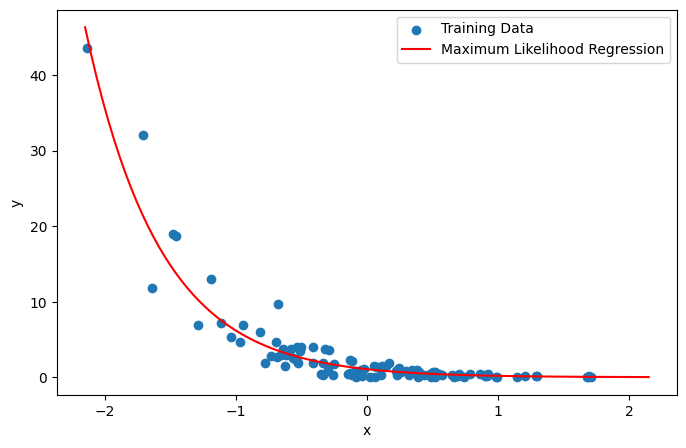

In [ ]:
# Make the plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
plt.scatter(x, y, label='Training Data')
plt.plot(x_new, y_pred, c='red', label='Maximum Likelihood Regression')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2 pts

---
### Question 7:  /14 Marks

* Fit a linear regression (ordinary least squares) to the data using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn` and obtain parameter estimates.
* Use `mean_squared_error` to calculate the regression error.
* Plot the regression line over the same range.



In [ ]:
# Fit the linear regression model
ols_fit = LinearRegression().fit(X, y)
betas_linear = ols_fit.coef_
print(f'The estimated coefficients using linear regression are {betas_linear}')
# 4 pts


# Calculate the mean squared error
y_hat_linear = ols_fit.predict(X)
mse_linear = mean_squared_error(y_hat_linear,y)
print(f"The mean of sqaured error is {mse_linear}")
# 4 pts

The estimated coefficients using linear regression are [ 0.         -5.11409159]
The mean of sqaured error is 20.804808321384726


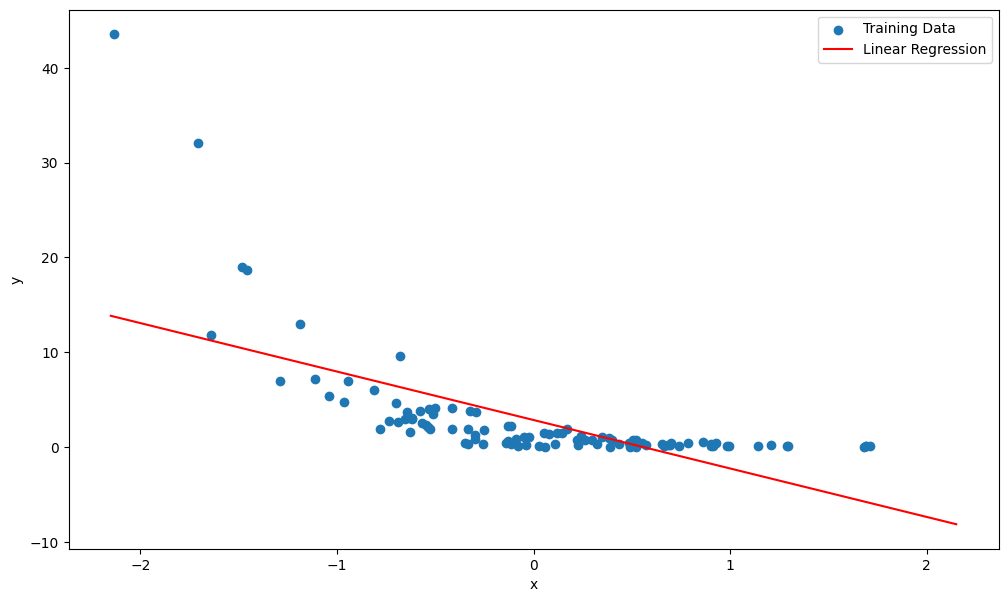

In [ ]:
# Get the predicted values
y_pred_linear = ols_fit.predict(X_new)
# 2 pts

# Make the plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.scatter(x, y, label='Training Data')
plt.plot(x_new, y_pred_linear, c='red', label='Linear Regression')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# 4 pts

---
### Question 8:  /16 Marks

* Fit a linear regression (ordinary least squares) to the data with a square term, and obtain parameter estimates.
* Use `mean_squared_error` to calculate the regression error.
* Plot the predictions over the same range.

Note that in this case the design matrix X should look like

$X =[[1,x_1,x_1^2],[1,x_2,x_2^2],...]$

In [ ]:
# Create new design matrix and fit the linear regression model
X_sq = np.c_[X, np.square(X[:,1])]
ols_fit2 = LinearRegression().fit(X_sq, y)
betas_sq = ols_fit2.coef_
print(f'The estimated coefficients using linear regression are {betas_sq}')
# 6 pts

# Calculate the mean squared error
y_hat_sq = ols_fit2.predict(X_sq)
mse_sq = mean_squared_error(y_hat_sq,y)
print(f"The mean of sqaured error is {mse_sq}")
# 4 pts

The estimated coefficients using linear regression are [ 0.         -4.96170882  4.34031982]
The mean of sqaured error is 7.529391721951647


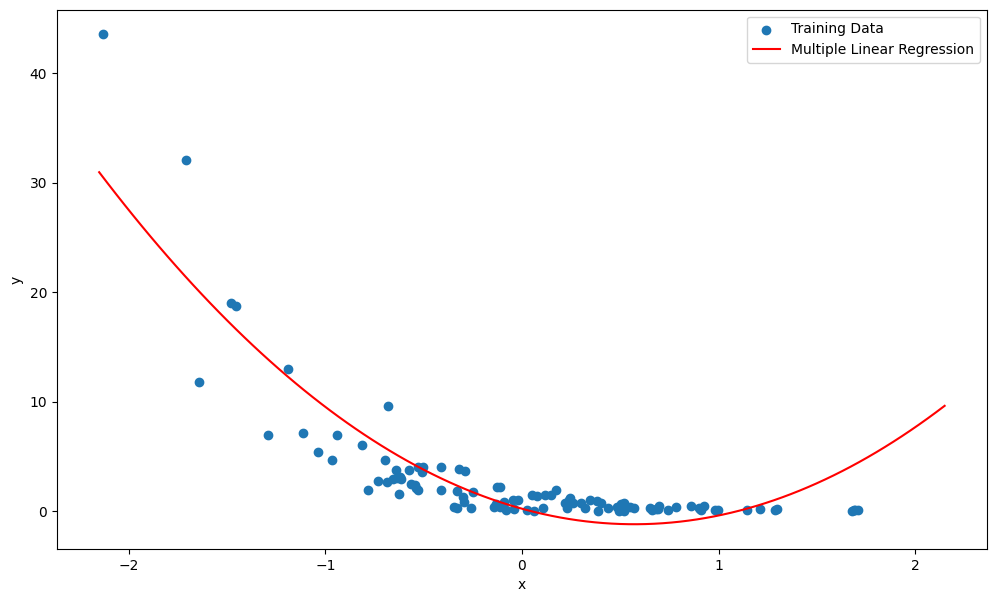

In [ ]:
# Make predictions on the new data
X_new_sq = np.c_[X_new, np.square(X_new[:,1])]
y_pred_sq = ols_fit2.predict(X_new_sq)
# 2 pts

# Make the plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
plt.scatter(x, y, label='Training Data')
plt.plot(x_new, y_pred_sq, c='red', label='Multiple Linear Regression')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# 4 pts

---
### Question 9: /2 Marks

Among the three models, which one would you select? What is the major problem using linear regression? Just a reminder that in this case $y$ is measured in time units.

**Written Answer**

The exponential regression is the best one. The linear regression model underestimates the values of $y$ for $x \in [-2.14, -1.5] \cup [1, 2.14]$. Indeed there is a more significant problem which is some predictions are negative, and this does not make sense with the fact that the model is intended to predict time values. This problem does not occur with the exponential regression model.

---
### Question 10: /20 Marks

We wish to do an experiment to determine if ants search for food using a random search or directed search method. To help design the experiment we first will run some simulations. In the experiment, ants are placed inside a 50 mm $\times$ 50 mm box. They cannot climb the wall, but can escape through an opening of size 5 mm in the wall. Repeated measurements of how far an ant travels in 1 second show an average speed of 2 mm per second. Our simulation needs to determine the probability that an ant escapes the box in 600 seconds (hint: so your main iteration would look like `for t in range(600):`) if their motion is indeed random. Assume the ant is always initially placed in the center of the box and simulate a simple random walk in 2D on discrete time in this fashion: Have the ant live on a discrete lattice. The ant takes 2 mm to the left if a random number $u$ satisfies $u < 0.25$. The ant moves 2 mm to the right if $0.25 \leq u < 0.5$, the ant moves 2 mm up if $0.5 \leq u < 0.75$, and 2 mm down if $0.75 \leq u \leq 1.0$. $u$ is distributed uniformly between 0 and 1 (hint: use `np.random.uniform(low=0, high=1)` to generate it). If a step would take the ant into a wall, repeat the step until it is successful (result is still one time-step). With `attempts = np.linspace(10, 1000, 19)`, run your main iteration under the loop `for M in attempts:` and construct a dataframe with columns for number of attempts (i.e. `M`), number of escapes, and probability of escape for every `M`. Your dataframe would eventually look something like this with 19 rows and real values:

attempts | escapes| probability
---|---|---
10|x1|y1
65|x2|y2
...|...|...
1000|x19|y19

In [ ]:
attempts = np.linspace(10, 1000, 19)

x    = 50       # box size in x-direction
y    = 50       # box size in y-direction
time = 600      # in seconds

# coordinate of one arbitrary opening of size 5 mm
x_open = [25, 30]
y_open = y-1

# distance in millimeters that the ant travels per second
delta  = 2

number_of_attempts = np.zeros([0])
number_of_escapes = np.zeros([0])

for M in attempts:

    escape = 0
    for trial in range(int(M)):

        # initialize X and Y coordinates for the ant
        X = np.zeros([time])
        Y = np.zeros([time])

        # ant's initial location
        x_ant = x/2
        y_ant = y/2

        i = -1
        ## Main loop:
        for t in range(time):
            u = np.random.uniform(low=0.0, high=1.0) # generates uniform random number

            # in case you are interested to examine normal random distribution:
            # u = abs(np.random.normal()) # generates absolute normal random number

            if ( u < 0.25 ):
                x_ant = x_ant - delta
            if ( u >= 0.25 ) & ( u < 0.5 ):
                x_ant = x_ant + delta
            if ( u >= 0.5 )  & ( u < 0.75 ):
                y_ant = y_ant + delta
            if ( u >= 0.75 ) & ( u <= 1 ):
                y_ant = y_ant - delta

            if (x_ant > 0) & (x_ant < x) & (y_ant > 0) & (y_ant < y):
                i += 1
                X[i] = x_ant
                Y[i] = y_ant
                x_ant_pre = x_ant
                y_ant_pre = y_ant
            else:
                # if a wall is hit keep producing random numbers
                # till a new coordinate fall inside the box:
                while (x_ant <= 0) | (x_ant >= x) | (y_ant <= 0) | (y_ant >= y):
                    u = np.random.uniform(low=0.0, high=1.0) # generates uniform random number

                    # in case you are interested to examine normal random distribution:
                    # u = abs(np.random.normal()) # generates absolute normal random number

                    if ( u < 0.25 ):
                        x_ant = x_ant_pre - delta
                    if ( u >= 0.25 ) & ( u < 0.5 ):
                        x_ant = x_ant_pre + delta
                    if ( u >= 0.5 ) & ( u < 0.75 ):
                        y_ant = y_ant_pre + delta
                    if ( u >= 0.75 ) & ( u <= 1 ):
                        y_ant = y_ant_pre - delta

                i += 1
                X[i] = x_ant
                Y[i] = y_ant

            # check if the ant escapes through the opening
            if (X[i] >= x_open[0]) & (X[i] <= x_open[-1]) & (Y[i] == y_open):
                escape += 1
                X_plot = X; Y_plot = Y # storing the last escape event for visualization in the next cell
                break
            ## End of main loop.
        ## End of trial loop.

    number_of_attempts = np.append(number_of_attempts, np.array([M]))
    number_of_escapes = np.append(number_of_escapes, np.array([int(escape)]))
    ## End of outer loop.

df_attempts = pd.DataFrame({"attempts": pd.Series(number_of_attempts)})
df_escapes = pd.DataFrame({"escapes": pd.Series(number_of_escapes)})
df_probability = pd.DataFrame({"probability": pd.Series(np.divide(number_of_escapes,number_of_attempts))})

ant = pd.concat([df_attempts, df_escapes, df_probability], axis=1)
display(ant.head())
display(ant.tail())

,attempts,escapes,probability
0,10.0,2.0,0.200000
1,65.0,18.0,0.276923
2,120.0,25.0,0.208333
3,175.0,45.0,0.257143
4,230.0,63.0,0.273913


,attempts,escapes,probability
14,780.0,211.0,0.270513
15,835.0,208.0,0.249102
16,890.0,225.0,0.252809
17,945.0,217.0,0.229630
18,1000.0,243.0,0.243000


---
### Question 11: /5 Marks

Plot the trajectory of the ant in the last escape event.

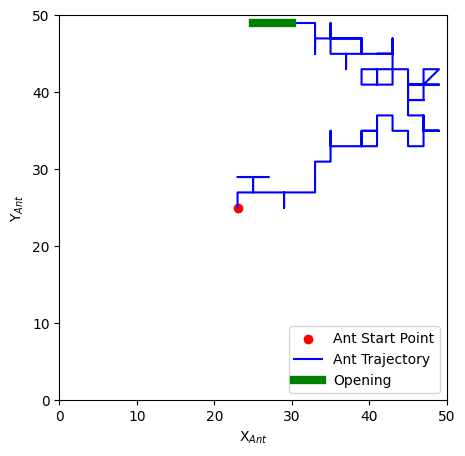

In [ ]:
# Let's visualize the last escape event
plt.figure(figsize=(5,5))
X_plot[ X_plot==0 ] = np.nan
Y_plot[ Y_plot==0 ] = np.nan
plt.scatter(X_plot[0], Y_plot[0], c='red', label="Ant Start Point")
plt.plot(X_plot,Y_plot, c='b', label="Ant Trajectory")
plt.plot(x_open, [y_open,y_open], 'g', label="Opening", linewidth=6)
plt.xlabel("X$_{Ant}$")
plt.ylabel("Y$_{Ant}$")
plt.xlim([0,x])
plt.ylim([0,y])
plt.legend(loc="lower right")
plt.show()

---
### Question 12: /5 Mark(s)
Explore the "ant" dataframe. Do you see any trend in probability? What value for probability would you report if you are asked what is the probability of the escape event?

Probability of escape event is about 24.9%.



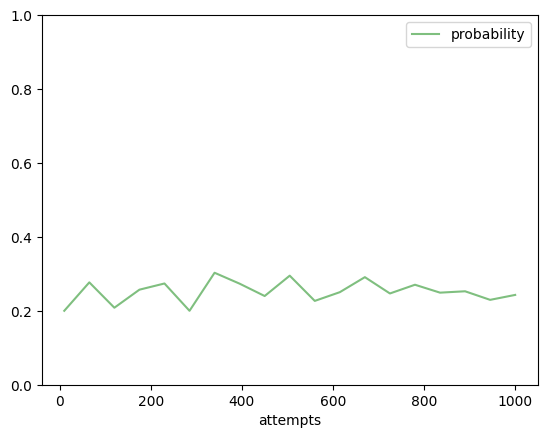

In [ ]:
fig, ax = plt.subplots(dpi = 100)
ant.plot.line('attempts','probability', ax = ax, alpha = 0.5, c='g')
ax.set_ylim([0,1])
print("Probability of escape event is about {}%.\n".format((ant.probability.tail(5).mean()*100).round(1)))

#### Written Answer:
As the number of attempts goes up the probability converges to a value about 26%.

---
### Question 13: /5 Mark(s)
Now scatter plot `attempts` versus `escapes` and use what you have learned so far to apply linear regression (ordinary least squares) to the data, and plot the predictions over the same range. Report your fit coefficients and compare them against your answer to the previous question and report what you witness and explain why?

[0.26]


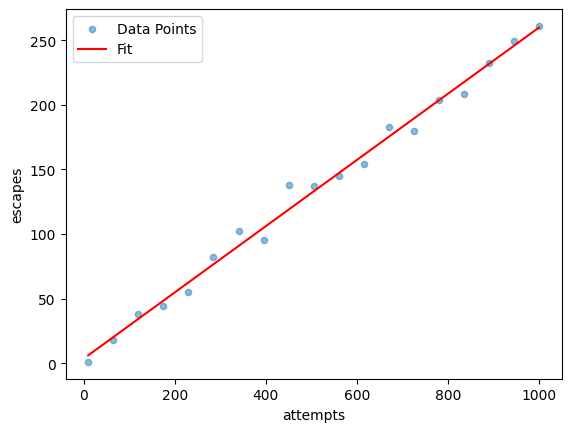

In [ ]:
fig, ax = plt.subplots(dpi = 100)
ant.plot.scatter('attempts','escapes', ax = ax, alpha = 0.5, label='Data Points')

x = ant.attempts.values
X = x.reshape(-1,1)
y = ant.escapes.values

ols_fit = LinearRegression().fit(X, y)
print(ols_fit.coef_.round(2))

newx = np.linspace(x.min(),x.max(),1001)
newX = newx.reshape(-1,1)
y_predicted_ols = ols_fit.predict(newX)

ax.plot(newx, y_predicted_ols, color = 'red', label='Fit')
plt.legend()
plt.show()

#### Written Answer:
Y-intercept is zero which makes sense because you do not expect to see any escape without any attempt made. The other coefficient (slope i.e., $\Delta escapes \div \Delta attempts$) is the same as the probability of escape event, this makes sense because we are witnessing a linear relationship between escapes and attempts, and probability remains the same as the number of attempts goes to infinity.

---
### Question 14: /5 Mark(s)
You gain 2 dollars every time the ant escapes, otherwise you loose a dollar. What would be the expected value of the bet and how would you interpret it?

#### Written Answer:

X = {escape, stay}

$P(X=escape)=0.26$

$P(X=stay)= 1-0.26 = 0.74$

$E(X)=\sum x P(X=x) = (2\times0.26)+(-1\times0.74)=-0.22$

If I make this bet infinite number of times, **on average**, I expect to lose 22 cents every time I bet.